In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  

In [3]:
df = pd.read_csv('heart_disease_risk_dataset_earlymed.csv')

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress       70000 non-null 

In [8]:
print(df.head())

   Chest_Pain  Shortness_of_Breath  Fatigue  Palpitations  Dizziness  \
0         0.0                  0.0      0.0           1.0        0.0   
1         0.0                  1.0      0.0           1.0        0.0   
2         1.0                  0.0      0.0           1.0        0.0   
3         1.0                  1.0      0.0           1.0        0.0   
4         0.0                  0.0      1.0           0.0        1.0   

   Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  High_BP  \
0       0.0                 0.0                 0.0      0.0   
1       0.0                 0.0                 0.0      1.0   
2       0.0                 0.0                 0.0      1.0   
3       0.0                 1.0                 1.0      1.0   
4       0.0                 0.0                 0.0      0.0   

   High_Cholesterol  Diabetes  Smoking  Obesity  Sedentary_Lifestyle  \
0               0.0       0.0      1.0      0.0                  1.0   
1               0.0       0.0      1.0

In [7]:
X = df[['Obesity', 'High_Cholesterol', 'High_BP']]
y = df['Heart_Risk']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [12]:
Y_pred = model.predict(X_test)

In [13]:
# View the intercept and coefficients
print(f"Intercept (b): {model.intercept_:.2f}")
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

Intercept (b): 0.04
            Feature  Coefficient
0           Obesity     0.301952
1  High_Cholesterol     0.305735
2           High_BP     0.306644


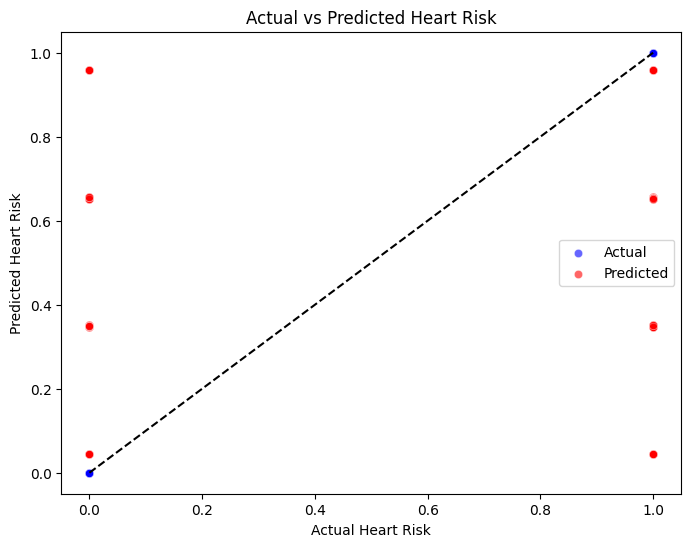

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values.flatten(), y=y_test.values.flatten(), color="blue", label="Actual", alpha=0.6)  # Actual values
sns.scatterplot(x=y_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Heart Risk")
plt.ylabel("Predicted Heart Risk")
plt.title("Actual vs Predicted Heart Risk")
plt.show()

In [16]:
mse = mean_squared_error(y_test, Y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 0.16


In [17]:
r2 = r2_score(y_test, Y_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.36
